# datetime 오브젝트 사용하기

datetime 라이브러리에는 날짜를 처리하는 date 오브젝트, 시간을 처리하는 time 오브젝트, 날짜와 시간을 모두 처리하는 datetime 오브젝트 등이 포함되어 있다.

In [1]:
from datetime import datetime

In [2]:
now1 = datetime.now()
print(now1)

2021-03-22 23:03:18.337009


In [3]:
now2 = datetime.today()
print(now2)

2021-03-22 23:03:18.356999


datetime 오브젝트를 생성할 때 시간을 직접 입력하여 인자로 전달할 수 있다.

In [4]:
t1 = datetime.now()
t2 = datetime(1970,1,1)
t3 = datetime(1970,12,12,13,24,34)

print(t1)
print(t2)
print(t3)

2021-03-22 23:03:18.372987
1970-01-01 00:00:00
1970-12-12 13:24:34


datetime 오브젝트를 사용하면 시간 계산을 할 수 있다.

In [5]:
diff1 = t1-t2

print(diff1)
print(type(diff1))

18708 days, 23:03:18.372987
<class 'datetime.timedelta'>


In [6]:
diff2 = t2-t1

print(diff2)
print(type(diff2))

-18709 days, 0:56:41.627013
<class 'datetime.timedelta'>


# 문자열을 datetime 오브젝트로 변환하기

문자열로 저장된 시계열 데이터를 datetime 오브젝트로 변환하면 시간 계산을 할 수 있다..

In [7]:
import pandas as pd
import os

In [8]:
ebola = pd.read_csv('../data/country_timeseries.csv')

In [9]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

td_datetime 메서드를 사용하면 Date 열의 자료형을 datetime 오브젝트로 변환할 수 있다.

In [10]:
ebola['date_dt']=pd.to_datetime(ebola['Date'])
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

시간 형식 지정자(%d, %m, %y)와 기호(/, -)를 적절히 조합하여 format 인자에 전달하면 그 형식에 맞게 정리된 datetime 오브젝트를 얻을 수 있다.

In [11]:
test_df1 = pd.DataFrame({'order_day':['01/01/15','02/01/15','03/01/15']})
test_df1['date_dt1']=pd.to_datetime(test_df1['order_day'], format='%d/%m/%y')
test_df1['date_dt2']=pd.to_datetime(test_df1['order_day'], format='%m/%d/%y')
test_df1['date_dt3']=pd.to_datetime(test_df1['order_day'], format='%y/%m/%d')

print(test_df1)

  order_day   date_dt1   date_dt2   date_dt3
0  01/01/15 2015-01-01 2015-01-01 2001-01-15
1  02/01/15 2015-01-02 2015-02-01 2002-01-15
2  03/01/15 2015-01-03 2015-03-01 2003-01-15


In [12]:
test_df2 = pd.DataFrame({'order_day':['01-01-15','02-01-15','03-01-15']})
test_df2['date_dt'] = pd.to_datetime(test_df2['order_day'], format='%d-%m-%y')
print(test_df2)

  order_day    date_dt
0  01-01-15 2015-01-01
1  02-01-15 2015-01-02
2  03-01-15 2015-01-03


## 시간 형식 지정자

|시간 형식 지정자|의미|결과|
|:---|:---|:---|
|%a|요일 출력|Sun, Mon, ···,Sat|
|%A|요일 출력(긴 이름)|Sunday, Monday, ···, Saturday|
|%w|요일 출력(숫자, 0부터 일요일)|1, 2,···,6|
|%d|날짜 출력(2자리로 표시)|01, 02, ···,31|
|%b|월 출력|Jan, Feb,···, Dec|
|%B|월 출력(긴 이름)|January, Februrary,···, December|
|%m|월 출력(숫자)|01, 02, ···, 12|
|%y|년 출력(2자리로 표시)|00, 01, ···, 99|
|%Y|년 출력(4자리로 표시)|0001, 0001, ···, 9999|
|%H|시간 출력(24시간)|00, 01, ···, 23|
|%I|시간 출력(12시간)|00, 01, ···, 12|
|%p|AM 또는 PM 출력|AM, PM|
|%M|분 출력(2자리로 표시)|00, 01, ···, 59|
|%S|초 출략(2자리로 표시)|00, 01, ···, 59|
|%f|마이크로초 출력|000000, 000001, ···, 999999|
|%z|UTC 차이 출력(+HHMM이나 -HHMM형태)|(None), +0000, -0400, +1030|
|%Z|기준 지역 이름 출력|(None), UTC, EST, CST|
|%j|올해의 지난 일 수 출력(1일, 2일, ···)|001, 002, ···, 366|
|%U|올해의 지난 주 수 출력(1주, 2주, ···)|00, 01, ···, 53|
|%c|날짜와 시간 출력|Tue Aug 16 21:30:00 1988|
|%x|날짜 출력|08/16/88 (None);08/16/1988|
|%X|시간 출력|21:30:00|
|%G|년 출력(ISO 8601 형식)|0001, 0002, ···,2013, ···, 9999|
|%u|요일 출력(ISO 8601 형식|1, 2, ···, 7|
|%V|올해의 지난 주 수 출력(ISO 8601 형식)|01, 02, ···,53|

# 시간 데이터를 잘라내고 싶어요

strftime 메서드와 시간 형식 지정자를 이용해 시계열 데이터를 잘라낼 수 있다.

In [13]:
now = datetime.now()
print(now)

2021-03-22 23:03:20.820597


In [14]:
nowDate=now.strftime('%Y-%m-%d')
print(nowDate)

2021-03-22


In [15]:
nowTime = now.strftime('%H:%M:S')
print(nowTime)

23:03:S


In [16]:
nowDatetime = now.strftime('%Y-%m-%d %H:%M:%S')
print(nowDatetime)

2021-03-22 23:03:20


# datetime 오브젝트로 변환하려는 열을 지정하여 데이터 집합 불러오기

to_datetime 메서드를 사용하는 것보다 datetime 오브젝트로 변환하려는 열ㅇ르 지정하여 데이터 집합을 불러오는 것이 더 간단하다.

In [17]:
ebola1 = pd.read_csv('../data/country_timeseries.csv', parse_dates=['Date'])
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

# datetime 오브젝트에서 날짜 정보 추출하기

datetime 오브젝트에는 년, 월, 일과 같은 날짜 정보를 따로 저장하고 있는 속성이 존재한다.

In [18]:
date_series=pd.Series(['2018-05-16','2018-05-17','2018-05-18'])
d1 = pd.to_datetime(date_series)
print(d1)

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]


In [19]:
print(d1[0].year)
print(d1[0].month)
print(d1[0].day)

2018
5
16



# dt 접근자로 시간 데이터 정리하기

문자열을 처리할 때 str 접근자를 사용한 다음 문자열 속성이나 메서드를 사용한 것처럼 datetime 오브젝트도 마찬가지로 dt 접근자를 사용하면 datetime 속성이나 메서드를 사용하여 시계열 데이터를 처리할 수 있다.

In [20]:
ebola= pd.read_csv('../data/country_timeseries.csv')
ebola['date_dt']=pd.to_datetime(ebola['Date'])

1. dt 접근자를 사용하지 않고 인덱스가 3인 데이터의 년, 월, 일 데이터를 추출한다.

이 방법은 date_dt 열의 특정 데이터를 인덱스로 접근해야 하기 때문에 불편하다.

In [21]:
print(ebola[['Date','date_dt']].head())

         Date    date_dt
0    1/5/2015 2015-01-05
1    1/4/2015 2015-01-04
2    1/3/2015 2015-01-03
3    1/2/2015 2015-01-02
4  12/31/2014 2014-12-31


In [22]:
print(ebola['date_dt'][3].year)
print(ebola['date_dt'][3].month)
print(ebola['date_dt'][3].day)

2015
1
2


2. dt 접근자로 date_dt 열에 한 번에 접근한 다음 year 속성을 이용하여 연도값을 추출한다.

추출한 연도 값은 ebola 데이터프레임에 새로운 열로 추가한다.

In [23]:
ebola['year']=ebola['date_dt'].dt.year
print(ebola[['Date','date_dt','year']].head())

         Date    date_dt  year
0    1/5/2015 2015-01-05  2015
1    1/4/2015 2015-01-04  2015
2    1/3/2015 2015-01-03  2015
3    1/2/2015 2015-01-02  2015
4  12/31/2014 2014-12-31  2014


3. 월, 일 데이터를 한 번에 추출해서 새로운 열로 추가한다.

In [24]:
ebola['month'], ebola['day'] = (ebola['date_dt'].dt.month, ebola['date_dt'].dt.day)
print(ebola[['Date','date_dt','year','month','day']].head())

         Date    date_dt  year  month  day
0    1/5/2015 2015-01-05  2015      1    5
1    1/4/2015 2015-01-04  2015      1    4
2    1/3/2015 2015-01-03  2015      1    3
3    1/2/2015 2015-01-02  2015      1    2
4  12/31/2014 2014-12-31  2014     12   31


date_dt 열은 datetime 오브젝트이고 year, month, day는 정수형이다.

In [25]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

# 에볼라 최초 발생일 계산해보기

ebola 데이터프레임은 데이터 시간 역순으로 정렬되어 있다.

In [26]:
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,...,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali,date_dt,year,month,day
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,...,2977.0,NaN,NaN,NaN,NaN,NaN,2015-01-05,2015,1,5
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,...,2943.0,NaN,NaN,NaN,NaN,NaN,2015-01-04,2015,1,4
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,...,2915.0,NaN,NaN,NaN,NaN,NaN,2015-01-03,2015,1,3
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-02,2015,1,2
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,...,2827.0,NaN,NaN,NaN,NaN,NaN,2014-12-31,2014,12,31


In [27]:
print(ebola.iloc[-5:,:5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117  3/27/2014    5         103.0            8.0                6.0
118  3/26/2014    4          86.0            NaN                NaN
119  3/25/2014    3          86.0            NaN                NaN
120  3/24/2014    2          86.0            NaN                NaN
121  3/22/2014    0          49.0            NaN                NaN


Timestamp는 Datetime 오브젝트와 호환되는 자료형이다. 따라서 min 메서드를 사용하여에볼라 최초 발병일 찾을 수 있다.

In [28]:
print(ebola['date_dt'].min())
print(type(ebola['date_dt'].min()))

2014-03-22 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


에볼라의 진행 정도 구하기
(ebola 데이터프레임의 Day 열에는 이 값이 저장되어 있다.)

In [29]:
ebola['outbreak_d']=ebola['date_dt']-ebola['date_dt'].min()
print(ebola[['Date','Day','outbreak_d']].head())

         Date  Day outbreak_d
0    1/5/2015  289   289 days
1    1/4/2015  288   288 days
2    1/3/2015  287   287 days
3    1/2/2015  286   286 days
4  12/31/2014  284   284 days


In [30]:
type(ebola['Day'])

pandas.core.series.Series

In [31]:
type(ebola['outbreak_d'])

pandas.core.series.Series

In [32]:
ebola['day'].equals(ebola['outbreak_d'])

False

In [33]:
ebola['outbreak_d'].dt.days

0      289
1      288
2      287
3      286
4      284
      ... 
117      5
118      4
119      3
120      2
121      0
Name: outbreak_d, Length: 122, dtype: int64

In [34]:
ebola['outbreak_nodays'] = ebola['outbreak_d'].dt.days

In [35]:
ebola['outbreak_nodays']

0      289
1      288
2      287
3      286
4      284
      ... 
117      5
118      4
119      3
120      2
121      0
Name: outbreak_nodays, Length: 122, dtype: int64

In [36]:
ebola['outbreak_nodays'].equals(ebola['day'])


False

In [37]:
ebola['outbreak_nodays_2'] = ebola['outbreak_d'].astype('int64')

In [38]:
ebola['outbreak_nodays_2']

0      24969600000000000
1      24883200000000000
2      24796800000000000
3      24710400000000000
4      24537600000000000
             ...        
117      432000000000000
118      345600000000000
119      259200000000000
120      172800000000000
121                    0
Name: outbreak_nodays_2, Length: 122, dtype: int64

In [39]:
ebola = ebola.drop(['outbreak_nodays_2'], axis=1)

In [40]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   Date                 122 non-null    object         
 1   Day                  122 non-null    int64          
 2   Cases_Guinea         93 non-null     float64        
 3   Cases_Liberia        83 non-null     float64        
 4   Cases_SierraLeone    87 non-null     float64        
 5   Cases_Nigeria        38 non-null     float64        
 6   Cases_Senegal        25 non-null     float64        
 7   Cases_UnitedStates   18 non-null     float64        
 8   Cases_Spain          16 non-null     float64        
 9   Cases_Mali           12 non-null     float64        
 10  Deaths_Guinea        92 non-null     float64        
 11  Deaths_Liberia       81 non-null     float64        
 12  Deaths_SierraLeone   87 non-null     float64        
 13  Deaths_Nigeria      

# 파산한 은행의 개수 계산하기

In [41]:
banks_no_dates = pd.read_csv('../data/banklist.csv')
print(banks.info())
print(banks.head())

NameError: name 'banks' is not defined

Cloasing Date, Updated Date 열의 데이터 자료형은 문자열이다.

read_csv 메서드의 parse_dates 속성을 이용해 문자열로 저장된 두 열을 datetime 오브젝트로 변환하여 불러보자.

In [42]:
banks = pd.read_csv('../data/banklist.csv', parse_dates=[5,6])
print(banks.info())
print(banks.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null    object        
 3   CERT                   555 non-null    int64         
 4   Acquiring Institution  555 non-null    object        
 5   Closing Date           555 non-null    datetime64[ns]
 6   Updated Date           555 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.5+ KB
None
                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Ba

dt 접근자와 quarter 속성을 이용하면 은행이 파산한 분기를 알 수 있다.

다음은 dt 접근자와 year, quarter 속성을 이용하여 은행이 파산한 연도, 분기를 새로운 열로 추가한 것이다.

In [43]:
banks['closing_quarter'], banks['closing_year']=(banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year)
print(banks.head())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  \
0                   Royal Savings Bank   2017-12-15   2017-12-20   
1                          Conway Bank   2017-10-13   2017-10-20   
2            United Fidelity Bank, fsb   2017-05-26   2017-07-26   
3  First-Citizens Bank & Trust Company   2017-05-05   2017-07-26   
4                         Whitney Bank   2017-04-28   2017-12-05   

   closing_quarter  closing_year  
0                4          2017  
1                4          2017  
2    

groupby 메서드를 사용하면 연도별로 파산한 은행의 개수를 구할 수 있다.

In [44]:
closing_year = banks.groupby(['closing_year']).size()
print(closing_year)

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64


In [45]:
banks 데이터프레임을 연도별로 그룹화한 다음 다시 분기별로 그룹화하여 출력한다.

SyntaxError: invalid syntax (<ipython-input-45-935780f42435>, line 1)

In [46]:
closing_year_q = banks.groupby(['closing_year','closing_quarter']).size()
print(closing_year_q)

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

In [47]:
closing_year_q.shape

(54,)

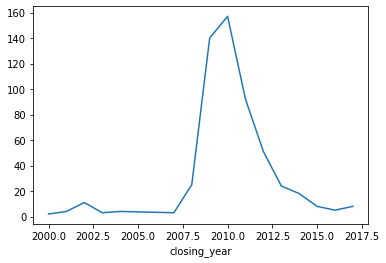

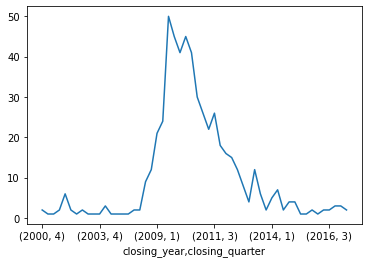

In [48]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax = closing_year.plot()
plt.show()

fig,ax = plt.subplots()
ax = closing_year_q.plot()
plt.show()

# 테슬라 주식 데이터로 시간 계산하기

~~pandas-datereader 라이브러리를 이용해 주식 데이터를 불러올 수 있다.~~

~~get_data_quanal 메서드에 TSLA라는 문자열을 전달하여 테슬라의 주식 데이터를 내려받은 다음 to_csv 메서드를 사용해 data 폴더 안에 'tesla_stock_quandl.csv'라는 이름으로 저장한다.~~

In [49]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [50]:
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as pdr

# tesla에는 데이터프레임이 저장된다.
tesla = pdr.get_data_quandl('TSLA')

# tesla에 저장된 데이터프레임을 파일로 저장한다.
tesla.to_csv('../data/tesla_stock_quandl.csv')

ValueError: The Quandl API key must be provided either through the api_key variable or through the environmental variable QUANDL_API_KEY.

In [51]:
tesla = pd.read_csv('../data/tesla_stock_quandl.csv', parse_dates=[0])
print(tesla.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1949 non-null   datetime64[ns]
 1   Open        1949 non-null   float64       
 2   High        1949 non-null   float64       
 3   Low         1949 non-null   float64       
 4   Close       1949 non-null   float64       
 5   Volume      1949 non-null   float64       
 6   ExDividend  1949 non-null   float64       
 7   SplitRatio  1949 non-null   float64       
 8   AdjOpen     1949 non-null   float64       
 9   AdjHigh     1949 non-null   float64       
 10  AdjLow      1949 non-null   float64       
 11  AdjClose    1949 non-null   float64       
 12  AdjVolume   1949 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 198.1 KB
None


In [52]:
tesla

,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
0,2018-03-27,304.00,304.2700,277.18,279.18,13696168.0,0.0,1.0,304.00,304.2700,277.18,279.18,13696168.0
1,2018-03-26,307.34,307.5900,291.36,304.18,8324639.0,0.0,1.0,307.34,307.5900,291.36,304.18,8324639.0
2,2018-03-23,311.25,311.6100,300.45,301.54,6600538.0,0.0,1.0,311.25,311.6100,300.45,301.54,6600538.0
3,2018-03-22,313.89,318.8200,308.18,309.10,4914307.0,0.0,1.0,313.89,318.8200,308.18,309.10,4914307.0
4,2018-03-21,310.25,322.4400,310.19,316.53,5927881.0,0.0,1.0,310.25,322.4400,310.19,316.53,5927881.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944,2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0
1945,2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0
1946,2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0
1947,2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0


불린 추출로 2010년 6월의 데이터만 추출한다.

In [53]:
print(tesla.loc[(tesla.Date.dt.year==2010)&(tesla.Date.dt.month==6)])

           Date   Open     High    Low  Close      Volume  ExDividend  \
1947 2010-06-30  25.79  30.4192  23.30  23.83  17187100.0         0.0   
1948 2010-06-29  19.00  25.0000  17.54  23.89  18766300.0         0.0   

      SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose   AdjVolume  
1947         1.0    25.79  30.4192   23.30     23.83  17187100.0  
1948         1.0    19.00  25.0000   17.54     23.89  18766300.0  


# datetime 오브젝트를 인덱스로 설정하여 데이터 추출하기

Date 열을 tesla 데이터프레임의 인덱스로 지정한다.

In [54]:
tesla.index=tesla['Date']
print(tesla.index)

DatetimeIndex(['2018-03-27', '2018-03-26', '2018-03-23', '2018-03-22',
               '2018-03-21', '2018-03-20', '2018-03-19', '2018-03-16',
               '2018-03-15', '2018-03-14',
               ...
               '2010-07-13', '2010-07-12', '2010-07-09', '2010-07-08',
               '2010-07-07', '2010-07-06', '2010-07-02', '2010-07-01',
               '2010-06-30', '2010-06-29'],
              dtype='datetime64[ns]', name='Date', length=1949, freq=None)


datetime 오브젝트를 인덱스로 지정하면 원하는 시간의 데이터를 바로 추출할 수 있다.

In [55]:
print(tesla['2015'].iloc[:5,:5])

                 Date    Open     High       Low   Close
Date                                                    
2015-12-31 2015-12-31  238.51  243.450  238.3700  240.01
2015-12-30 2015-12-30  236.60  243.634  235.6707  238.09
2015-12-29 2015-12-29  230.06  237.720  229.5470  237.19
2015-12-28 2015-12-28  231.49  231.980  225.5400  228.95
2015-12-24 2015-12-24  230.56  231.880  228.2800  230.57


2010년 6월의 데이터를 추출한다.

In [56]:
print(tesla['2010-06'].iloc[:,:5])

                 Date   Open     High    Low  Close
Date                                               
2010-06-30 2010-06-30  25.79  30.4192  23.30  23.83
2010-06-29 2010-06-29  19.00  25.0000  17.54  23.89


# 시간 간격을 인덱스로 설정하여 데이터 추출하기

주식 데이터에서 `최초 5일간 수집된 데이터만` 살펴보고 싶다면 `시간 간격을 인덱스로 지정하여 데이터를 추출`하면 된다.

Date 열에서 Date 열의 최솟값(2010-06-29)을 빼면 데이터를 수집한 이후에 시간이 얼마나 흘렀는지 알 수 있다. 

아래는 Date 열에서 Date 열의 최솟값을 뺀 다음 ref_date 열로 추가한 것이다.

In [57]:
tesla['ref_date']=tesla['Date']-tesla['Date'].min()
print(tesla.head())

                 Date    Open    High     Low   Close      Volume  ExDividend  \
Date                                                                            
2018-03-27 2018-03-27  304.00  304.27  277.18  279.18  13696168.0         0.0   
2018-03-26 2018-03-26  307.34  307.59  291.36  304.18   8324639.0         0.0   
2018-03-23 2018-03-23  311.25  311.61  300.45  301.54   6600538.0         0.0   
2018-03-22 2018-03-22  313.89  318.82  308.18  309.10   4914307.0         0.0   
2018-03-21 2018-03-21  310.25  322.44  310.19  316.53   5927881.0         0.0   

            SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose   AdjVolume  \
Date                                                                     
2018-03-27         1.0   304.00   304.27  277.18    279.18  13696168.0   
2018-03-26         1.0   307.34   307.59  291.36    304.18   8324639.0   
2018-03-23         1.0   311.25   311.61  300.45    301.54   6600538.0   
2018-03-22         1.0   313.89   318.82  308.18    309.10   4

In [58]:
tesla.index=tesla['ref_date']
print(tesla.iloc[:5,:5])

                Date    Open    High     Low   Close
ref_date                                            
2828 days 2018-03-27  304.00  304.27  277.18  279.18
2827 days 2018-03-26  307.34  307.59  291.36  304.18
2824 days 2018-03-23  311.25  311.61  300.45  301.54
2823 days 2018-03-22  313.89  318.82  308.18  309.10
2822 days 2018-03-21  310.25  322.44  310.19  316.53


데이터를 수집한 이후 최초 5일의 데이터를 추출한다.

4 days는 데이터가 처음부터 없어서 출력되지 않는다.

In [59]:
print(tesla['5 days':].iloc[:5,:5])

               Date   Open     High    Low  Close
ref_date                                         
3 days   2010-07-02  23.00  23.1000  18.71  19.20
2 days   2010-07-01  25.00  25.9200  20.27  21.96
1 days   2010-06-30  25.79  30.4192  23.30  23.83
0 days   2010-06-29  19.00  25.0000  17.54  23.89


# 시간 범위 생성하여 인덱스로 지정하기

특정 일에 누락된 데이터도 포함시켜 데이터를 살펴보려면 임의로 시간 범위를 생성하여 인덱스로 지정해야 한다.

In [73]:
ebola=pd.read_csv('../data/country_timeseries.csv',parse_dates=[0])
print(ebola.iloc[:5,:5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0


In [74]:
print(ebola.iloc[-5:,:5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


2015년 1월 1일의 데이터와 2014년 3월 23일의 데이터가 누락되어 있다.

date_range 메서드를 사용하여 2014년 12월 31일부터 2015년 1월 5일 사이의 시간 인덱스를 생선한다.

In [75]:
head_range=pd.date_range(start='2014-12-31',end='2015-01-05')
print(head_range)

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')


원본 데이터 손상을 방지하기 위해 ebola 데이터프레임의 앞쪽 5개의 데이터를 추출해 새로운 데이터프레임을 만든다.

이때 Date 열을 인덱스로 먼저 지정하지 않으면 오류가 발생하기에 반드시 Date 열을 인덱스로 지정한 다음 생성한 시간 범위를 인덱스로 지정해야 한다.

In [76]:
ebola_5 = ebola.head()
print(ebola_5)

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
0 2015-01-05  289        2776.0            NaN            10030.0   
1 2015-01-04  288        2775.0            NaN             9780.0   
2 2015-01-03  287        2769.0         8166.0             9722.0   
3 2015-01-02  286           NaN         8157.0                NaN   
4 2014-12-31  284        2730.0         8115.0             9633.0   

   Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
0            NaN            NaN                 NaN          NaN         NaN   
1            NaN            NaN                 NaN          NaN         NaN   
2            NaN            NaN                 NaN          NaN         NaN   
3            NaN            NaN                 NaN          NaN         NaN   
4            NaN            NaN                 NaN          NaN         NaN   

   Deaths_Guinea  Deaths_Liberia  Deaths_SierraLeone  Deaths_Nigeria  \
0         1786.0             NaN

In [77]:
ebola_5.index=ebola_5['Date']
print(ebola_5)

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
Date                                                                         
2015-01-05 2015-01-05  289        2776.0            NaN            10030.0   
2015-01-04 2015-01-04  288        2775.0            NaN             9780.0   
2015-01-03 2015-01-03  287        2769.0         8166.0             9722.0   
2015-01-02 2015-01-02  286           NaN         8157.0                NaN   
2014-12-31 2014-12-31  284        2730.0         8115.0             9633.0   

            Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
Date                                                                        
2015-01-05            NaN            NaN                 NaN          NaN   
2015-01-04            NaN            NaN                 NaN          NaN   
2015-01-03            NaN            NaN                 NaN          NaN   
2015-01-02            NaN            NaN                 NaN        

In [78]:
ebola_5.reindex(head_range)

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
2014-12-31,2014-12-31,284.0,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
2015-01-01,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,2015-01-02,286.0,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,2015-01-03,287.0,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
2015-01-04,2015-01-04,288.0,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2015-01-05,2015-01-05,289.0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN


In [79]:
print(ebola_5.iloc[:5,:5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2015-01-05 2015-01-05  289        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286           NaN         8157.0                NaN
2014-12-31 2014-12-31  284        2730.0         8115.0             9633.0


# 시간 범위의 주기 설정하기

시간 범위를 인덱스로 지정하면 DatetimeIndex 자료형이 만들어진다.

DatetimeIndex에는 freq 속성이 포함되어 있는데 freq 속성값을 지정하면 시간 간격을 조절하여 DatetimeIndex를 만들 수 있다.

아래 표는 freq 속성값으로 사용할 수 있는 시간 주기를 표로 정리한 것이다.

|시간|설명|
|:---|:---|
|B|평일만 포함|
|C|사용자가 정의한 평일만 포함|
|D|달력 일자 단위|
|W|주간 단위|
|M|월 마지막 날만 포함|
|SM|15일과 월 마지막 날만 포함|
|BM|M 주기의 값이 휴일이면 제외하고 평일만 포함|
|CBM|BM에 사용자 정의 평일을 적용|
|MS|월 시작일만 포함|
|SMS|월 시작일과 15일만 포함|
|BMS|MS 주기의 값이 휴일이면 제외하고 평일만 포함|
|CBMS|BMS에 사용자 정의 평일을 적용|
|Q|3,6,9,12월 분기 마지막 날만 포함|
|BQ|3,6,9,12월 분기 마지막 날이 휴일이면 제외하고 평일만 포함|
|QS|3,6,9,12월 분기 시작일만 포함|
|BQS|3,6,9,12월 분기 시작일이 휴일이면 제외하고 평일만 포함|
|A|년의 마지막 날만 포함|
|BA|년의 마지막 날이 휴일이면 제외하고 평일만 포함|
|AS|년의 시작일만 포함|
|BAS|년의 시작일이 휴일이면 제외하고 평일만 포함|
|BH|평일을 시간 단위로 포함(09:00~16:00)|
|H|시간 단위로 포함(00:00~00:00)|
|T|분 단위 포함|
|S|초 단위 포함|
|L|밀리초 단위 포함|
|U|마이크로초 단위 포함|
|N|나노초 단위 포함|

아래는 date_range 메서드의 freq 인잣값을 B로 설정하여 평일만 포함시킨 DatetimeIndex를 만든 것이다.

In [82]:
print(pd.date_range('2017-01-01','2017-01-07',freq='B'))

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06'],
              dtype='datetime64[ns]', freq='B')


# 에볼라 발병 시간 비교하기

나라별로 에볼라의 확산 속도를 비교하려면 발생하기 시작한 날짜를 옮기는 것이 좋다.

이를 확인하기 위해 ebola 데이터프레임으로 그래프를 그려보고 에볼라의 확산 속도를 비교하는 데 어떤 문제가 있는지를 살펴보고 해결방법을 알아보자.

아래는 ebola 데이터프레임의 Date 열을 인덱스로 지정하고 x축을 Date 열로, y축을 사망자 수로 지정하여 그린 그래프이다.

In [86]:
ebola.iloc[0:,0:]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2015-01-05,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2015-01-04,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2015-01-03,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,2015-01-02,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-12-31,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2014-03-27,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,2014-03-26,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,2014-03-25,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,2014-03-24,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
ebola.iloc[0:,1:]

,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


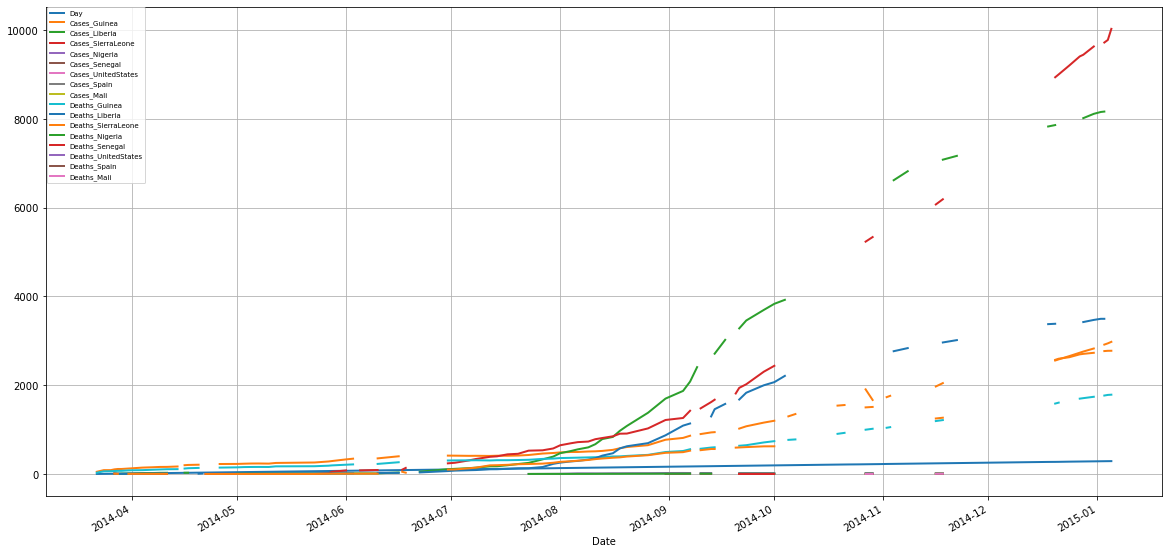

In [92]:
import matplotlib.pyplot as plt

# plt.rcParams["figure.figsize"] = (20,10)
# plt.rcParams['axes.grid'] = True 

ebola.index=ebola['Date']

fig, ax = plt.subplots()
ax = ebola.iloc[0:,1:].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.1)
plt.show()

위의 그래프는 에볼라 발병일이 달라 그래프가 그려지기 시작한 지점이 다르다.

각 나라의 발별일을 가장 처음 에볼라가 발병한 Guinea와 동일한 위치로 옮겨야 나라별 에볼라의 확산 속도를 제대로 비교할 수 있다.

In [93]:
ebola_sub=ebola[['Day','Cases_Guinea','Cases_Liberia']]
print(ebola_sub.tail(10))

            Day  Cases_Guinea  Cases_Liberia
Date                                        
2014-04-04   13         143.0           18.0
2014-04-01   10         127.0            8.0
2014-03-31    9         122.0            8.0
2014-03-29    7         112.0            7.0
2014-03-28    6         112.0            3.0
2014-03-27    5         103.0            8.0
2014-03-26    4          86.0            NaN
2014-03-25    3          86.0            NaN
2014-03-24    2          86.0            NaN
2014-03-22    0          49.0            NaN


Date 열의 자료형을 datetime 오브젝트로 변환하여 ebola 데이터프레임을 다시 생성한다.

그런데 중간에 아예 날짜가 없는 데이터(2015-01-01)도 있는데 이 데이터도 포함시켜야 확산 속도를 제대로 비교할 수 있다.

In [94]:
ebola=pd.read_csv('../data/country_timeseries.csv',parse_dates=['Date'])
print(ebola.head().iloc[:,:5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0


In [95]:
print(ebola.tail().iloc[:,:5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


Date 열을 인덱스로 지정한 다음 ebola 데이터프레임의 Date 열의 최댓값과 최솟값으로 시간 범위를 생성하여 new_idx에 저장한다.

이렇게 하면 날짜가 아예 없었던 데이터의 인덱스를 생성할 수 있다.

In [104]:
ebola.index=ebola['Date']
new_idx=pd.date_range(ebola.index.min(),ebola.index.max())

new_idx는 ebola 데이터 집합에 있는 시간 순서와 반대로 생선되어 있다.

시간 순서를 맞추기 위해 reversed 메서드를 사용해서 인덱스를 반대로 뒤집자.

In [105]:
print(new_idx)

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')


In [106]:
new_idx=reversed(new_idx)

reindex 메서드를 사용해 새로 생성한 인덱스(new_idx)를 새로운 인덱스로 지정한다.

그러면 2015-01-01 데이터처럼 ebola 데이터프레임에 아예 없었던 날짜가 추가된다.

In [108]:
ebola=ebola.reindex(new_idx)
print(ebola.head().iloc[:,:5])

                 Date    Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                        
2015-01-05 2015-01-05  289.0        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288.0        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287.0        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286.0           NaN         8157.0                NaN
2015-01-01        NaT    NaN           NaN            NaN                NaN


In [109]:
print(ebola.tail().iloc[:,:5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2014-03-26 2014-03-26  4.0          86.0            NaN                NaN
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN
2014-03-24 2014-03-24  2.0          86.0            NaN                NaN
2014-03-23        NaT  NaN           NaN            NaN                NaN
2014-03-22 2014-03-22  0.0          49.0            NaN                NaN


다음은 last_valid_index(가장 오래된 데이터를 가져온다), first_valid_index(가장 최근의 데이터를 가져온다) 메서드를 사용해 각 나라의 에볼라 발병일을 구한다.

각각의 메서드는 유효한 값이 있는 천 번째와 마지막 인덱스를 반환한다.

In [110]:
last_valid=ebola.apply(pd.Series.last_valid_index)
last_valid

Date                  2014-03-22
Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]

In [111]:
first_valid=ebola.apply(pd.Series.first_valid_index)
first_valid

Date                  2015-01-05
Day                   2015-01-05
Cases_Guinea          2015-01-05
Cases_Liberia         2015-01-03
Cases_SierraLeone     2015-01-05
Cases_Nigeria         2014-12-07
Cases_Senegal         2014-12-07
Cases_UnitedStates    2014-12-07
Cases_Spain           2014-12-07
Cases_Mali            2014-12-07
Deaths_Guinea         2015-01-05
Deaths_Liberia        2015-01-03
Deaths_SierraLeone    2015-01-05
Deaths_Nigeria        2014-12-07
Deaths_Senegal        2014-12-07
Deaths_UnitedStates   2014-12-07
Deaths_Spain          2014-12-07
Deaths_Mali           2014-12-07
dtype: datetime64[ns]

에볼라 발병일을 동일한 출발선으로 옮기려면 에볼라가 가장 처음 발병한(earliest_date)에서 각 나라의 에볼라 발병일을 뺀 만큼(shift_values)만 옮기면 된다.

In [114]:
earliest_date=ebola.index.min()
print(earliest_date)

shift_values=last_valid-earliest_date
print(shift_values)

2014-03-22 00:00:00
Date                    0 days
Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
dtype: timedelta64[ns]


shift메서드를 사용해 모든 열의 값을 shift_values 값만큼 옮긴다. shift 메서드는 인잣값만큼 데이터를 밀어내 각 나라의 에볼라 발병일을 옮기는 데 사용된다.

In [120]:
ebola_dict = {}
for idx, col in enumerate(ebola):
    d = shift_values[idx].days
    print('idx, col, d:', idx, col, d)
    print(ebola[col])
    shifted=ebola[col].shift(d)
    ebola_dict[col]=shifted
    print(ebola_dict[col])

idx, col, d: 0 Date 0
Date
2015-01-05   2015-01-05
2015-01-04   2015-01-04
2015-01-03   2015-01-03
2015-01-02   2015-01-02
2015-01-01          NaT
                ...    
2014-03-26   2014-03-26
2014-03-25   2014-03-25
2014-03-24   2014-03-24
2014-03-23          NaT
2014-03-22   2014-03-22
Name: Date, Length: 290, dtype: datetime64[ns]
Date
2015-01-05   2015-01-05
2015-01-04   2015-01-04
2015-01-03   2015-01-03
2015-01-02   2015-01-02
2015-01-01          NaT
                ...    
2014-03-26   2014-03-26
2014-03-25   2014-03-25
2014-03-24   2014-03-24
2014-03-23          NaT
2014-03-22   2014-03-22
Name: Date, Length: 290, dtype: datetime64[ns]
idx, col, d: 1 Day 0
Date
2015-01-05    289.0
2015-01-04    288.0
2015-01-03    287.0
2015-01-02    286.0
2015-01-01      NaN
              ...  
2014-03-26      4.0
2014-03-25      3.0
2014-03-24      2.0
2014-03-23      NaN
2014-03-22      0.0
Name: Day, Length: 290, dtype: float64
Date
2015-01-05    289.0
2015-01-04    288.0
2015-01-03    28

ebola_dict에는 시간을 다시 설정한 데이터가 딕셔너리 형태로 저장되어 있다.

다음은 DataFrame 메서드를 사용해 ebola_dict의 값을 데이터프레임으로 변환한다.

In [124]:
ebola_shift=pd.DataFrame(ebola_dict)
ebola_shift

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Date,,,,,,,,,,,,,,,,,,
2015-01-05,2015-01-05,289.0,2776.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,2015-01-04,288.0,2775.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,2015-01-03,287.0,2769.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1767.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,2015-01-02,286.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-03-26,2014-03-26,4.0,86.0,8.0,2.0,1.0,NaN,1.0,1.0,NaN,62.0,4.0,2.0,1.0,NaN,0.0,1.0,NaN
2014-03-25,2014-03-25,3.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-24,2014-03-24,2.0,86.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,59.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
에볼라 최초 발병일(2014-03-22)을 기준으로 모든 열의 데이터가 옮겨졌다

SyntaxError: invalid syntax (<ipython-input-126-8567a7b9b34d>, line 1)

In [127]:
print(ebola_shift.tail())

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
Date                                                                         
2014-03-26 2014-03-26  4.0          86.0            8.0                2.0   
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN   
2014-03-24 2014-03-24  2.0          86.0            7.0                NaN   
2014-03-23        NaT  NaN           NaN            3.0                2.0   
2014-03-22 2014-03-22  0.0          49.0            8.0                6.0   

            Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
Date                                                                        
2014-03-26            1.0            NaN                 1.0          1.0   
2014-03-25            NaN            NaN                 NaN          NaN   
2014-03-24            NaN            NaN                 NaN          NaN   
2014-03-23            NaN            NaN                 NaN        

마지막으로 인덱스를 Day 열로 지정하고 그래프에 필요 없는 Date, Day 열은 삭제하면 그래프를 그리기 위한 데이터프레임이 완성된다.

In [128]:
ebola_shift.index=ebola_shift['Day']
ebola_shift=ebola_shift.drop(['Date','Day'], axis=1)
print(ebola_shift.tail())

     Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_Nigeria  \
Day                                                                  
4.0          86.0            8.0                2.0            1.0   
3.0          86.0            NaN                NaN            NaN   
2.0          86.0            7.0                NaN            NaN   
NaN           NaN            3.0                2.0            NaN   
0.0          49.0            8.0                6.0            0.0   

     Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
Day                                                               
4.0            NaN                 1.0          1.0         NaN   
3.0            NaN                 NaN          NaN         NaN   
2.0            NaN                 NaN          NaN         NaN   
NaN            NaN                 NaN          NaN         NaN   
0.0            1.0                 1.0          1.0         1.0   

     Deaths_Guinea  Deaths_Liberia  Dea

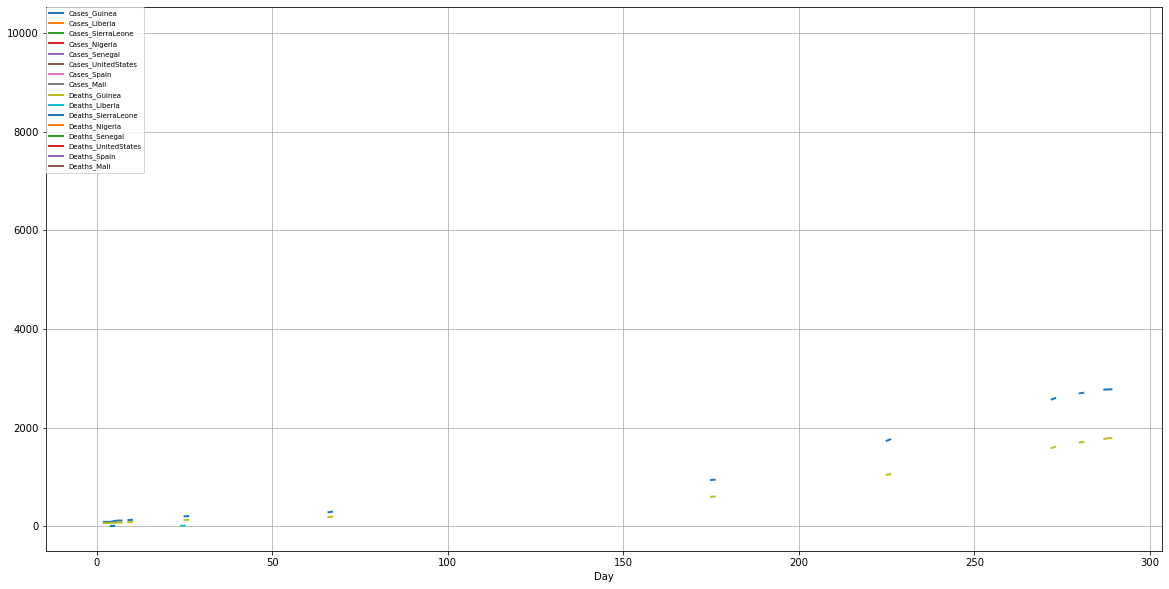

In [129]:
fig, ax = plt.subplots()
ax = ebola_shift.iloc[:,:].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show()